# Korelasyon Bulma
Tahmini süre: 30 dakika

Bu laboratuvar çalışmasında, temizlenmiş bir veri kümesiyle keşifsel veri analizi (EDA) yapacaksınız. Verilerin dağılımını inceleyecek, aykırı değerleri belirleyecek ve veri kümesindeki farklı sütunlar arasındaki korelasyonu belirleyeceksiniz.

Hedefler
Bu laboratuvar çalışmasında şunları yapacaksınız:

Veri kümesindeki tazminat verilerinin dağılımını belirlemek.

Veri kümesini iyileştirmek için aykırı değerleri kaldırmak.

Veri kümesindeki çeşitli özellikler arasındaki korelasyonları belirlemek.

Uygulamalı Laboratuvar Çalışması
- Adım 1: Gerekli Kütüphaneleri Kurma ve İçe Aktarma

In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 126.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 54.9 MB/s eta 0:00:00


# Adım 2: Veri Setini Yükleyin

In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head(5)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


# 3. Adım: Ücret Dağılımını Analiz Etme ve Görselleştirme
Görev: Katılımcılar arasında yıllık ücretin dağılımını incelemek için ConvertedCompYearly değişkeninin dağılımını ve histogramını çizin.

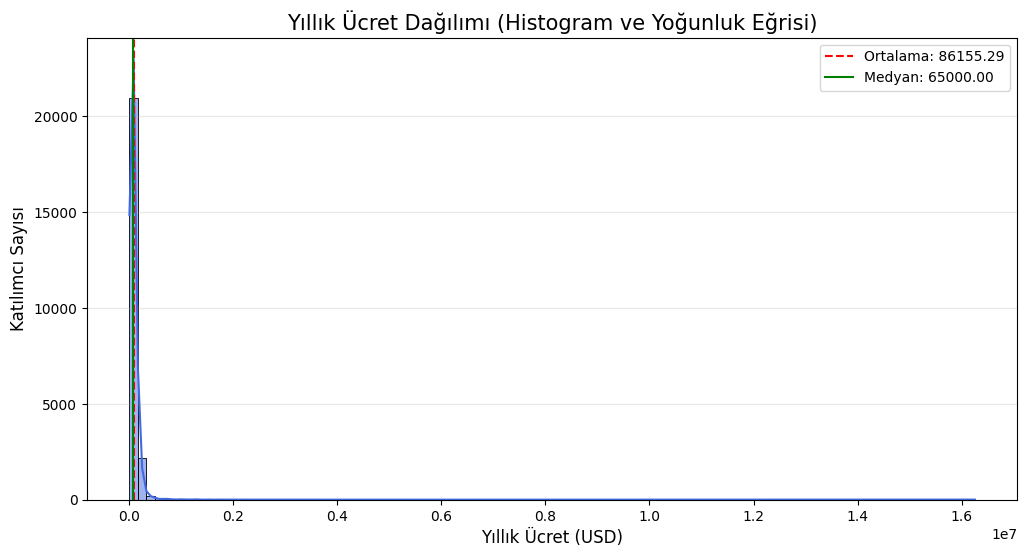

Verinin Çarpıklık (Skewness) Katsayısı: 52.92


In [3]:
# 1. Dağılım ve Histogramı aynı grafikte çizelim
plt.figure(figsize=(12, 6))

# sns.histplot kullanarak hem histogramı hem de KDE (yoğunluk) eğrisini görelim
sns.histplot(df['ConvertedCompYearly'].dropna(), kde=True, bins=100, color='royalblue')

# Ortalama ve Medyanı ekleyelim ki çarpıklığı (Skewness) görelim
plt.axvline(df['ConvertedCompYearly'].mean(), color='red', linestyle='--', label=f'Ortalama: {df["ConvertedCompYearly"].mean():.2f}')
plt.axvline(df['ConvertedCompYearly'].median(), color='green', linestyle='-', label=f'Medyan: {df["ConvertedCompYearly"].median():.2f}')

plt.title('Yıllık Ücret Dağılımı (Histogram ve Yoğunluk Eğrisi)', fontsize=15)
plt.xlabel('Yıllık Ücret (USD)', fontsize=12)
plt.ylabel('Katılımcı Sayısı', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

# 2. Sayısal çarpıklık değerini kontrol edelim
print(f"Verinin Çarpıklık (Skewness) Katsayısı: {df['ConvertedCompYearly'].skew():.2f}")

In [4]:
"""
0: Tam simetrik (Çan eğrisi).
0.5 - 1.0: Hafif çarpık.
1.0'dan büyük: Önemli derecede çarpık.
52.92: Bu verinin artık "normal" bir yanı kalmamış demek!
"""

'\n0: Tam simetrik (Çan eğrisi).\n0.5 - 1.0: Hafif çarpık.\n1.0\'dan büyük: Önemli derecede çarpık.\n52.92: Bu verinin artık "normal" bir yanı kalmamış demek!\n'

##Özetle: Ortalama (85 bin), Medyan'dan (65 bin) tam 20 bin dolar daha yukarıda. Bu da demek oluyor ki, o 16 milyonluk birkaç kişi, 65 bin kişinin ortalamasını haksız yere 20 bin dolar yukarı çekiyor.

# 4. Adım: Tam Zamanlı Çalışanlar İçin Ortanca Ücreti Hesaplayın
Görev: Çalışma durumu "Tam zamanlı çalışan" olan katılımcılar için ortanca ücreti hesaplamak üzere verileri filtreleyin.

In [5]:
# 1. Employment sütununa göre sadece 'Employed, full-time' olanları filtreleyelim
full_time_df = df[df['Employment'] == 'Employed, full-time']

# 2. Bu filtrelediğimiz kitle için ConvertedCompYearly medyanını hesaplayalım
median_full_time = full_time_df['ConvertedCompYearly'].median()

# 3. Sonuçları yazdıralım
print(f"Tam Zamanlı Çalışan Sayısı: {len(full_time_df)}")
print(f"Tam Zamanlı Çalışanlar için Ortanca (Medyan) Ücret: {median_full_time:,.2f} USD")

# 4. Kıyaslama için genel medyanı da görelim
print(f"Tüm Veri Setinin Ortanca Ücreti: {df['ConvertedCompYearly'].median():,.2f} USD")

Tam Zamanlı Çalışan Sayısı: 39041
Tam Zamanlı Çalışanlar için Ortanca (Medyan) Ücret: 69,814.00 USD
Tüm Veri Setinin Ortanca Ücreti: 65,000.00 USD


# Adım 5: Ülkelere Göre Ücret Aralığı ve Dağılımının Analizi
DönüştürülebilirYıllıkÜcret sütunundaki ücret aralığını ülkeler arasındaki farklılıkları analiz ederek inceleyin. Her bir ülke için ücret dağılımlarını karşılaştırmak üzere kutu grafikleri kullanın ve her bölgedeki varyasyonları ve anormallikleri belirleyerek küresel ücret eğilimlerine ilişkin bilgiler edinin.

/tmp/ipykernel_331/3995922953.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


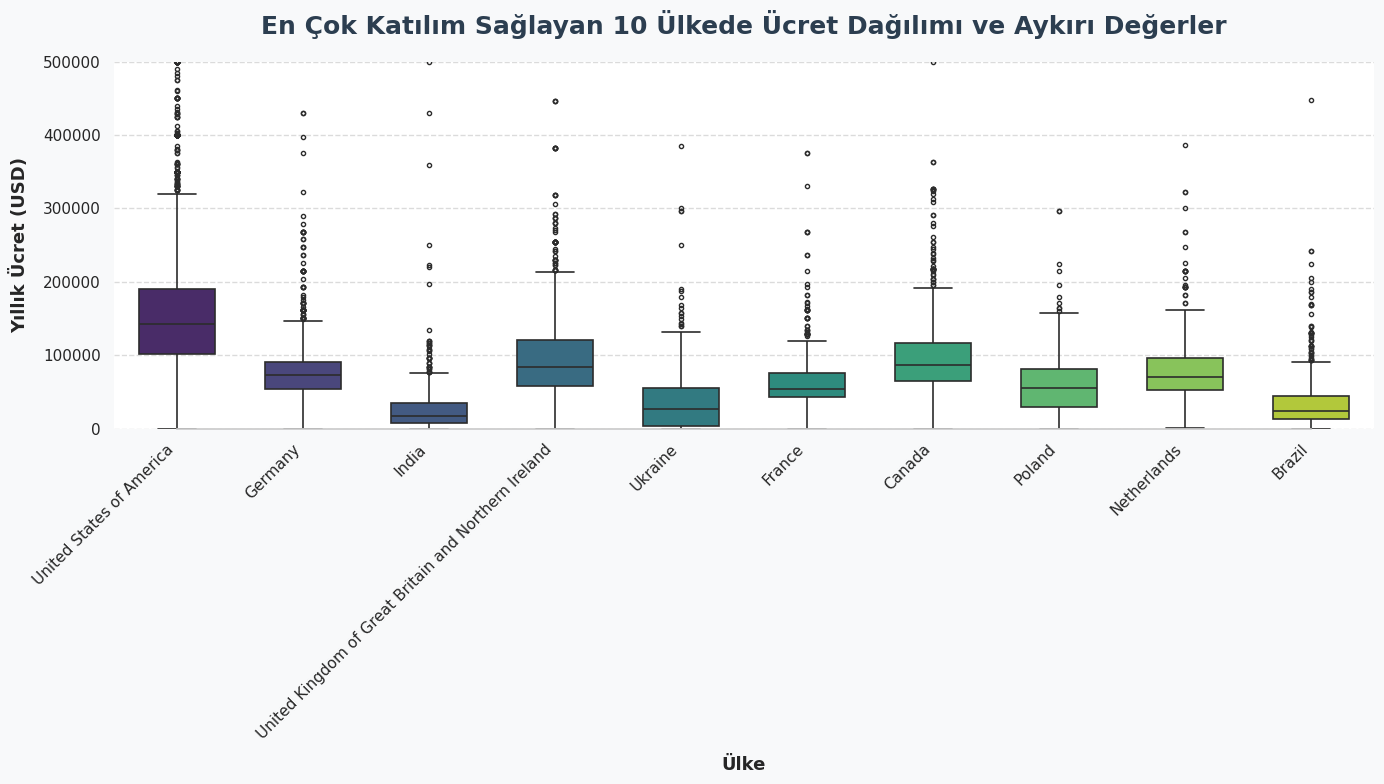

In [10]:
# 1. Veri Hazırlığı (Mevcut kodunla aynı)
top_countries = df['Country'].value_counts().nlargest(10).index
df_top_countries = df[df['Country'].isin(top_countries)]

# 2. Stil ve Görsel Ayarlar
sns.set_theme(style="whitegrid") # Daha temiz ve modern bir arka plan
plt.figure(figsize=(14, 8), facecolor='#f8f9fa') # Dış çerçeve rengi

# 3. Kutu Grafiği (Box Plot)
# palette='viridis' veya 'coolwarm' gibi daha profesyonel renkler kullanabilirsin
ax = sns.boxplot(
    data=df_top_countries, 
    x='Country', 
    y='ConvertedCompYearly', 
    palette='viridis', 
    order=top_countries, # Ülkeleri katılım sırasına göre dizer
    width=0.6,           # Kutuların genişliği
    linewidth=1.2,       # Çizgi kalınlığı
    fliersize=3          # Aykırı değer noktalarının boyutu
)

# --- KRİTİK DÜZELTME: X EKSENİ YAZILARI ---
plt.xticks(
    rotation=45, 
    ha='right',          # Yazıların bitiş noktasını kutunun tam altına hizalar
    fontsize=11, 
    fontweight='medium'
)

# 4. Başlık ve Etiketlerin Güzelleştirilmesi
plt.title('En Çok Katılım Sağlayan 10 Ülkede Ücret Dağılımı ve Aykırı Değerler', 
          fontsize=18, fontweight='bold', pad=20, color='#2c3e50')

plt.xlabel('Ülke', fontsize=13, fontweight='bold', labelpad=10)
plt.ylabel('Yıllık Ücret (USD)', fontsize=13, fontweight='bold', labelpad=10)

# 5. Y Ekseni Sınırı ve Detaylar
plt.ylim(0, 500000) # Okunabilirlik için 500k sınırı (isteğe bağlı)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Kenarlardaki gereksiz çizgileri kaldırarak modern bir görünüm sağlar
sns.despine(trim=True, left=True)

# Yazıların grafiğin dışına taşmasını engeller
plt.tight_layout()

plt.show()

## Adım 6: Veri Kümesinden Aykırı Değerleri Kaldırma
Görev: Korelasyon analizi için daha rafine bir veri kümesi elde etmek amacıyla ConvertedCompYearly sütunundaki aykırı değerleri kaldırarak yeni bir DataFrame oluşturun.

In [17]:
# 1. Çeyreklikler (Quantiles) üzerinden IQR hesaplama
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# 2. Alt ve Üst Sınırların Belirlenmesi
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Aykırı değerleri filtreleyip yeni DataFrame'i oluşturma
# Not: Maaş 0'dan küçük olamayacağı için lower_bound negatif çıksa bile sorun olmaz.
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)].copy()

# 4. Temizlik Sonuçlarını Doğrulama
print(f"--- Temizlik Özeti ---")
print(f"Orijinal Veri Seti Satır Sayısı: {len(df)}")
print(f"Aykırı Değerler Temizlendikten Sonraki Satır Sayısı: {len(df_no_outliers)}")
print(f"Temizlenen Toplam Kayıt Sayısı (Aykırı Değerler + NaN): {len(df) - len(df_no_outliers)}")

# 5. Yeni İstatistiksel Durum
print(f"\nYeni Ortalama Maaş: {df_no_outliers['ConvertedCompYearly'].mean():,.2f} USD")
print(f"Yeni Maksimum Maaş: {df_no_outliers['ConvertedCompYearly'].max():,.2f} USD")

--- Temizlik Özeti ---
Orijinal Veri Seti Satır Sayısı: 65437
Aykırı Değerler Temizlendikten Sonraki Satır Sayısı: 22457
Temizlenen Toplam Kayıt Sayısı (Aykırı Değerler + NaN): 42980

Yeni Ortalama Maaş: 71,347.20 USD
Yeni Maksimum Maaş: 220,207.00 USD


# Adım 7: Temel Değişkenler Arasındaki Korelasyonları Bulma
Görev: ConvertedCompYearly, WorkExp ve JobSatPoints_1 değişkenleri arasındaki korelasyonları hesaplayın. Bu korelasyonları bir ısı haritası ile görselleştirin.


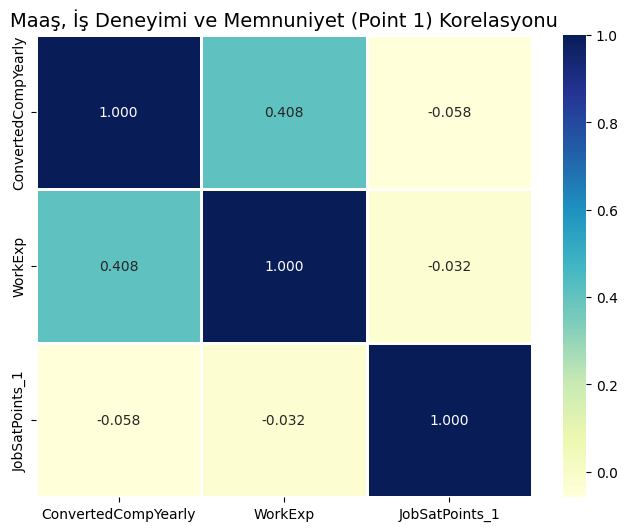

Korelasyon Matrisi:
                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.408438       -0.058170
WorkExp                         0.408438  1.000000       -0.032388
JobSatPoints_1                 -0.058170 -0.032388        1.000000


In [18]:
# 1. İlgili sütunları seçelim ve sayısal olduklarından emin olalım
# errors='coerce' kullanarak sayısal olmayan (metin) değerleri NaN yaparız
df_no_outliers['WorkExp'] = pd.to_numeric(df_no_outliers['WorkExp'], errors='coerce')
df_no_outliers['JobSatPoints_1'] = pd.to_numeric(df_no_outliers['JobSatPoints_1'], errors='coerce')

# 2. Korelasyon hesaplanacak sütun listesi
target_cols = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']

# 3. Korelasyon Matrisini oluşturma
final_corr_matrix = df_no_outliers[target_cols].corr()

# 4. Görselleştirme: Isı Haritası (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(final_corr_matrix, annot=True, cmap='YlGnBu', fmt=".3f", linewidths=2)

plt.title('Maaş, İş Deneyimi ve Memnuniyet (Point 1) Korelasyonu', fontsize=14)
plt.show()

print("Korelasyon Matrisi:")
print(final_corr_matrix)

Analiz: Bu çok kritik bir bulgu! Negatif olması, maaş arttıkça memnuniyetin çok küçük bir miktar azaldığını veya ikisi arasında aslında hiçbir doğrusal bağ olmadığını gösterir. Yani bir çalışana daha fazla para vermek, onun JobSatPoints_1 puanını otomatik olarak artırmıyor.


analiz: 
Deneyim ve Memnuniyet (-0.032)
Yorum: Tecrübe arttıkça memnuniyet artmıyor, aksine nötr kalıyor.

Analiz: Kıdemli yazılımcılar daha çok kazanıyor olabilir (0.408 bağı sayesinde bunu biliyoruz), ancak daha mutlu olduklarını söyleyemeyiz.

# Adım 8: Korelasyonlar için Dağılım Grafiği
Görev: ConvertedCompYearly ve WorkExp ile ConvertedCompYearly ve JobSatPoints_1 arasındaki belirli korelasyonları incelemek için dağılım grafikleri oluşturun.

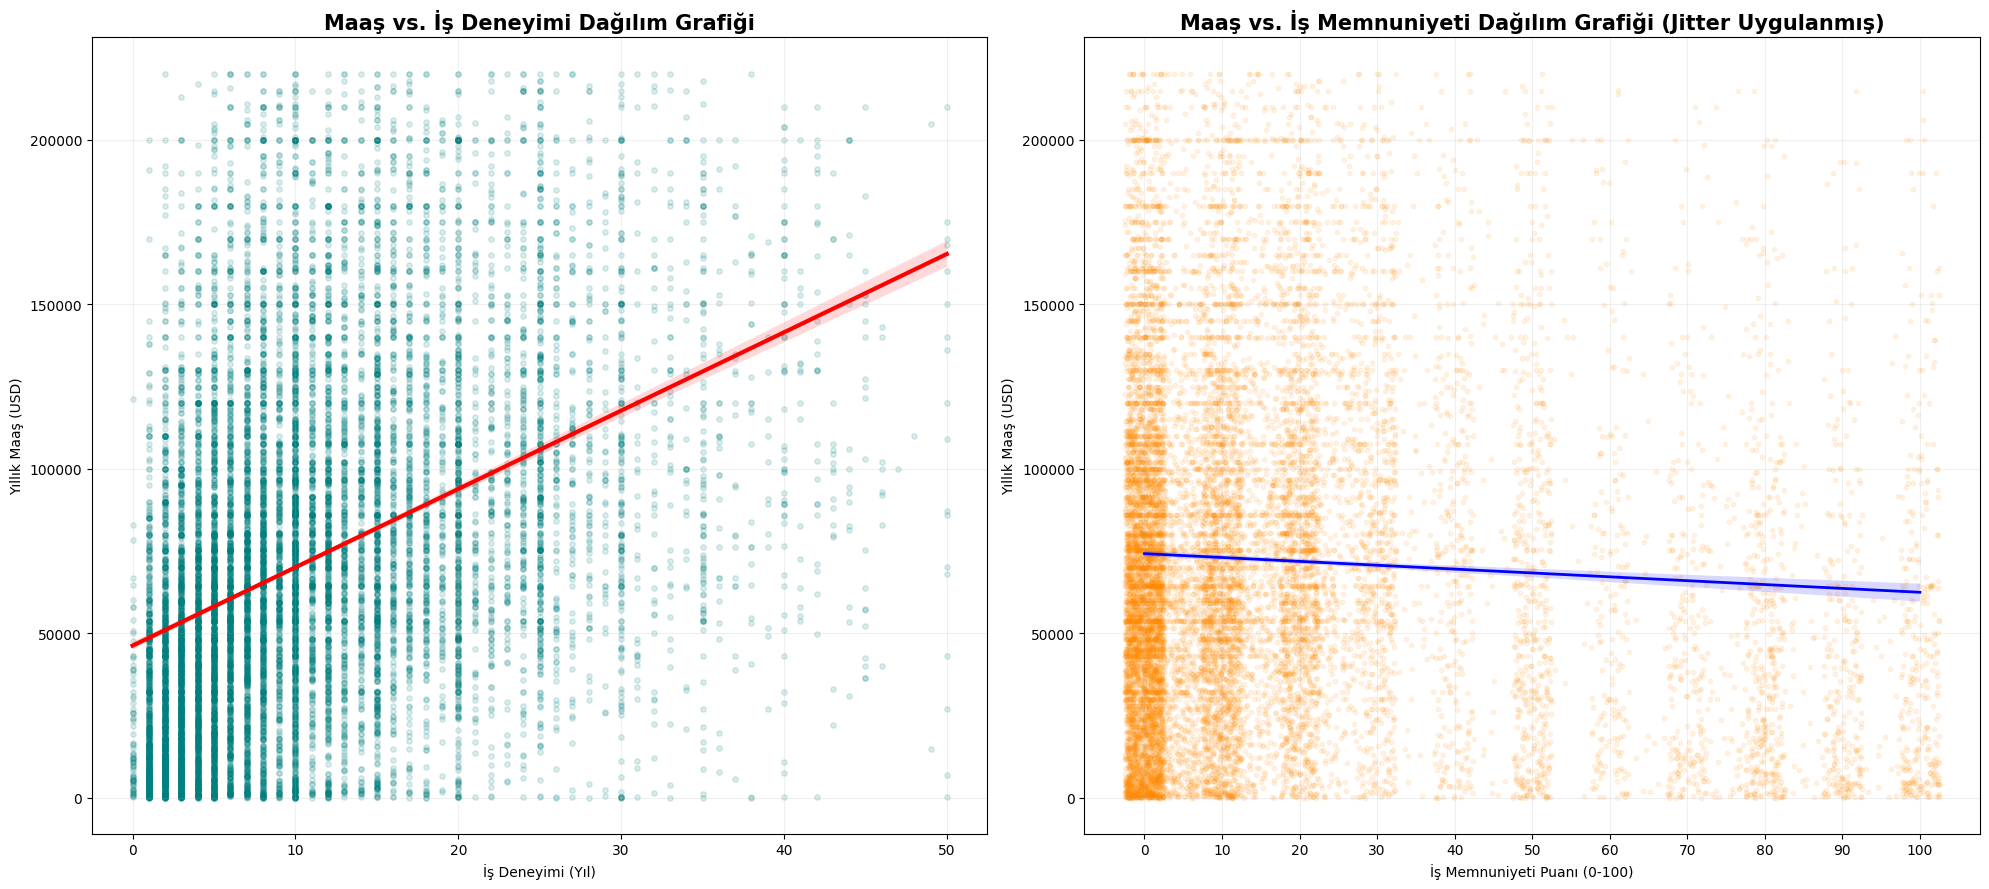

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Grafik alanını hazırlayalım
plt.figure(figsize=(20, 9))

# --- GRAFİK 1: Maaş vs. İş Deneyimi (Korelasyon: 0.41) ---
plt.subplot(1, 2, 1)
sns.regplot(data=df_no_outliers, x='WorkExp', y='ConvertedCompYearly', 
            scatter_kws={'alpha':0.15, 'color':'teal', 's':15}, 
            line_kws={'color':'red', 'lw':3})
plt.title('Maaş vs. İş Deneyimi Dağılım Grafiği', fontsize=15, fontweight='bold')
plt.xlabel('İş Deneyimi (Yıl)')
plt.ylabel('Yıllık Maaş (USD)')
plt.grid(True, alpha=0.2)

# --- GRAFİK 2: Maaş vs. İş Memnuniyeti (Korelasyon: -0.06) ---
plt.subplot(1, 2, 2)
# x_jitter: Noktaları yatayda hafifçe dağıtarak rakamların okunmasını sağlar
# s: Nokta boyutunu küçülterek üst üste binmeyi azaltır
sns.regplot(data=df_no_outliers, x='JobSatPoints_1', y='ConvertedCompYearly', 
            x_jitter=2.5, # Puanlar arasında 2.5 birimlik rastgele dağılım ekler
            scatter_kws={'alpha':0.1, 'color':'darkorange', 's':10}, 
            line_kws={'color':'blue', 'lw':2},
            fit_reg=True) # Korelasyonun zayıflığını gösteren yatay çizgiyi koruyalım

plt.title('Maaş vs. İş Memnuniyeti Dağılım Grafiği (Jitter Uygulanmış)', fontsize=15, fontweight='bold')
plt.xlabel('İş Memnuniyeti Puanı (0-100)')
plt.ylabel('Yıllık Maaş (USD)')

# X eksenindeki rakamların birbirine girmemesi için aralıklı gösterelim
plt.xticks(range(0, 101, 10)) 
plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

1:  Nokta Bulutu: Noktalar çizginin etrafında bir "bulut" oluşturur. 0.41 orta bir değer olduğu için noktalar çizgiye çok yapışık değildir; yani deneyim tek başına maaşı belirlemez ama önemli bir etkendir.

2: Dikey Sütunlar:
Dağılım: Her memnuniyet puanında (hem mutsuz olanda hem çok mutlu olanda) hemen hemen her maaş seviyesinden insan olduğunu göreceksin. Bu da bize neden korelasyonun sıfıra yakın çıktığını açıklar: Yüksek maaş almak, otomatik olarak yüksek memnuniyet puanı getirmiyor.

Sol alttaki (0-10 yıl deneyim ve düşük/orta maaş) o koyu, içi dolu yeşil bölge, noktaların binlercesinin üst üste binmesi yüzünden öyle görünüyor. (Junior Yoğunluğu)
Kodda alpha=0.3 (şeffaflık) kullandık. Tek bir nokta soluk görünürken, 100 tane nokta aynı yere bindiğinde o şeffaf renkler birleşip "koyu ve katı" bir yeşile dönüşür.
Sektörel Sebep: 40 yıl boyunca kod yazmaya devam eden (veya ankete katılan) kişi sayısı çok azdır. Noktalar üst üste binmediği için o %30 şeffaflık (alpha) olduğu gibi kalıyor ve sana "içi boş/silik" gibi geliyor.

In [22]:
# 1. En son analiz ettiğimiz, aykırı değerleri olmayan ve 
# sayısal dönüşümleri yapılmış veri setini kaydediyoruz
df_no_outliers.to_csv('survey_data_final_refined.csv', index=False)

print("### MODÜL 3 TAMAMLANDI! ###")
print("1. Aykırı değerler temizlendi (IQR yöntemiyle).")
print("2. Sayısal dönüşümler (Yaş, Deneyim) yapıldı.")
print("3. Korelasyon analizleri görselleştirildi.")
print("4. Nihai veri seti 'survey_data_final_refined.csv' adıyla kaydedildi.")

### MODÜL 3 TAMAMLANDI! ###
1. Aykırı değerler temizlendi (IQR yöntemiyle).
2. Sayısal dönüşümler (Yaş, Deneyim) yapıldı.
3. Korelasyon analizleri görselleştirildi.
4. Nihai veri seti 'survey_data_final_refined.csv' adıyla kaydedildi.


Özet
Bu laboratuvar çalışmasında, aşağıdaki temel korelasyon analizi becerilerini uyguladınız:

Yıllık ücret dağılımını histogramlar ve kutu grafikleriyle incelediniz.

Ücret verilerinden aykırı değerleri tespit edip kaldırdınız.

Ücret, iş deneyimi ve iş memnuniyeti gibi temel değişkenler arasındaki korelasyonları hesapladınız.

Bu özellikler arasındaki ilişkilere dair fikir edinmek için dağılım grafikleri ve ısı haritaları ile ilişkileri görselleştirdiniz.

Bu adımları izleyerek, veri kümesi içindeki ilişkileri analiz etmek için sağlam bir temel oluşturdunuz.